In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from tqdm.notebook import tqdm

In [3]:
ds = pd.read_csv('../Covid_19_aggregated.csv')
print(ds.shape)
ds.head()

(25756, 58)


,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,C1_School closing,C2_Workplace closing,C3_Cancel public events,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,Population,GrowthRate,Area,Density,Airports,GDP
0,Afghanistan,33.0,65.0,01/22/2020,0,0,0,0.0,0.0,0.0,...,NaN,NaN,37.746,0.5,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
1,Afghanistan,33.0,65.0,01/23/2020,0,0,0,0.0,0.0,0.0,...,NaN,NaN,37.746,0.5,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
2,Afghanistan,33.0,65.0,01/24/2020,0,0,0,0.0,0.0,0.0,...,NaN,NaN,37.746,0.5,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
3,Afghanistan,33.0,65.0,01/25/2020,0,0,0,0.0,0.0,0.0,...,NaN,NaN,37.746,0.5,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
4,Afghanistan,33.0,65.0,01/26/2020,0,0,0,0.0,0.0,0.0,...,NaN,NaN,37.746,0.5,38041.754,1.0233,652230.0,58.3257,22.0,74792.0


In [4]:
ds['Date_dt'] = pd.to_datetime(ds['Date'])

In [5]:
import re

In [6]:
cols_key = ['Country', 'Date_dt']
assert ds[cols_key].drop_duplicates().shape[0]==ds.shape[0]
cols_target = ['Confirmed','Deaths','Recovered']
cols_geo = ['Lat','Long']
cols_policy = [f for f in ds.columns if re.match('[CEH]\d', f)] + ['M1_Wildcard']
cols_indexes = [f for f in ds.columns if f.endswith('Index')]
cols_perc_change = [f for f in ds.columns if '_percent_change_' in f]
cols_health = ['extreme_poverty', 'handwashing_facilities','hospital_beds_per_thousand']
cols_country_stat = ['Population', 'GrowthRate', 'Area', 'Density', 'Airports', 'GDP']
cols_tests = ['total_tests','new_tests','total_tests_per_thousand', 'new_tests_per_thousand','new_tests_smoothed', 'new_tests_smoothed_per_thousand']
cols_age = ['median_age','aged_65_older','aged_70_older',]
cols_ill = ['cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers']

In [7]:
ds.drop(cols_key+cols_target+cols_geo+cols_policy+cols_indexes+cols_perc_change+cols_health+cols_country_stat+cols_tests+cols_age+cols_ill,1).columns

Index(['Date'], dtype='object')

In [8]:
train_ids = (ds['Date_dt']>'2020-01-22')&(ds['Date_dt']<='2020-05-07')
test_ids = (ds['Date_dt']>='2020-05-08')&(ds['Date_dt']<='2020-05-28')
ds[train_ids]['Date'].nunique(), ds[test_ids]['Date'].nunique(),  ds[train_ids].shape, ds[test_ids].shape

(106, 21, (19928, 59), (3948, 59))

In [9]:
for f in tqdm(cols_target):
    for x in range(1,4):
        s = ds.groupby(cols_key)[(f+f'_lag{x-1}') if x>1 else f].rolling(1).mean().shift(1).reset_index()
        s = s[s['Date_dt']!='2020-01-22']
        s.index = s['level_2']
        s.index.name = None
        ds[f+f'_lag{x}'] = s[(f+f'_lag{x-1}') if x>1 else f]

In [10]:
cols_lag = [f for f in ds.columns if '_lag' in f]

In [11]:
for f in cols_target:
    for x in range(0,3):
        ds[f"{f}_diff{x}" if x>0 else f"{f}_diff"] = ds[f'{f}_lag{x}' if x>0 else f]-ds[f"{f}_lag{x+1}" if x>0 else f"{f}_lag1"]
        ds[f"{f}_diff{x}" if x>0 else f"{f}_diff"] = ds[f"{f}_diff{x}" if x>0 else f"{f}_diff"].fillna(0)

In [12]:
cols_diff = [f for f in ds.columns if '_diff' in f]
cols_diff

['Confirmed_diff',
 'Confirmed_diff1',
 'Confirmed_diff2',
 'Deaths_diff',
 'Deaths_diff1',
 'Deaths_diff2',
 'Recovered_diff',
 'Recovered_diff1',
 'Recovered_diff2']

In [13]:
from datetime import timedelta

In [14]:
[x for x in ds['Country'].values if 'Bel' in x]

['Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Belarus',
 'Be

In [15]:
cds = ds[ds['Country'].isin(['US'])]

In [16]:
cds.index = cds['Date_dt']

In [17]:
s_ = cds.loc[cds.index-timedelta(days=7),'Confirmed_diff']

/home/egor/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [18]:
s = cds['Confirmed_diff']

In [19]:
cds['Confirmed_diff2'].max()

36188.0

In [20]:
cds['C1_School closing'].value_counts()

3.0    92
0.0    43
Name: C1_School closing, dtype: int64

(array([737446., 737456., 737477., 737485., 737506., 737516., 737537.,
        737546., 737567., 737577.]), <a list of 10 Text xticklabel objects>)

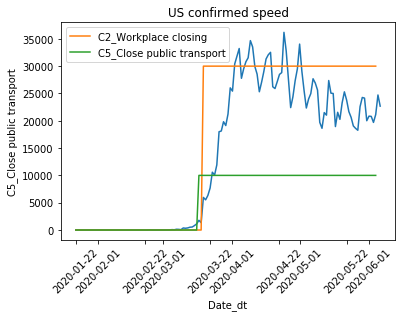

In [21]:
sns.lineplot(x='Date_dt', y='Confirmed_diff', data=cds)
for f in ['C2_Workplace closing', 'C5_Close public transport']:#cols_policy[:10]:
    sns.lineplot(x=cds['Date_dt'], y=cds[f]*10000, label=f)
plt.title('US confirmed speed')
plt.legend()

plt.xticks(rotation=45)

cols_key, cols_target, cols_geo, cols_policy, cols_indexes, cols_perc_change, 
cols_health, cols_country_stat, cols_tests, 
cols_age, cols_ill

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
cols_train = cols_geo+cols_policy+cols_indexes+cols_perc_change+cols_health+cols_country_stat+ cols_tests+cols_age+cols_ill+cols_lag+list(set(cols_diff)-set(['Confirmed_diff','Recovered_diff','Deaths_diff']))

In [37]:
rf = RandomForestRegressor()
rf.fit(ds.loc[train_ids, cols_train].fillna(0), ds.loc[train_ids, 'Confirmed_diff'])

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
import shap

In [39]:
explainer = shap.TreeExplainer(rf)

In [43]:
sv = explainer.shap_values(ds.loc[test_ids, cols_train].fillna(0).head(1000))

In [44]:
sv_ds = pd.DataFrame(sv, columns=cols_train)

In [45]:
sv_ds

,Lat,Long,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,...,Deaths_lag3,Recovered_lag1,Recovered_lag2,Recovered_lag3,Confirmed_diff1,Deaths_diff1,Recovered_diff1,Deaths_diff2,Recovered_diff2,Confirmed_diff2
0,0.687040,-0.185200,0.121672,-0.120952,0.009138,-0.149788,-0.163716,0.523340,-0.073230,-0.149081,...,1.236206,-0.481487,-0.556121,1.021668,22.256134,-2.545069,-0.658941,4.802674,-1.165955,-41.296833
1,1.295917,-0.281430,0.122305,0.446719,0.015871,-0.238067,-0.037461,0.176348,-0.082286,0.124899,...,0.235700,-0.141121,-0.504500,1.017923,37.537214,-1.748051,-2.029718,-3.168940,0.399914,-76.302034
2,1.527646,1.243109,-0.352105,0.548936,0.007402,0.024460,-0.185773,0.186885,-0.092525,0.182422,...,0.683488,0.024245,-0.995033,2.297112,59.281376,-3.862872,1.508382,-1.821154,2.923412,-29.761616
3,-1.208118,0.510687,0.027444,0.511693,0.006197,0.101582,-0.070489,0.562257,-0.148686,0.111689,...,0.282585,0.058864,0.391866,2.106668,95.835500,-3.986120,-0.827476,-0.779841,-0.392271,-16.825465
4,-0.393963,0.049052,0.110692,0.391622,0.019744,3.355277,-0.113901,-0.381809,0.037674,-0.851095,...,0.514320,-0.030338,-0.484114,2.039077,100.893630,-5.439793,-2.126043,-0.756161,-1.980556,102.426597
5,-0.162296,0.178348,0.026902,0.600856,0.012854,0.045025,-0.182567,0.261477,-0.068269,0.008603,...,0.839366,0.401641,-0.754461,1.230581,108.688932,-7.689326,0.614117,-1.680390,2.741392,36.980767
6,-0.034363,1.230015,-0.346822,0.273874,0.007776,0.053412,-0.111203,0.134927,-0.103028,0.156953,...,0.973073,1.039637,-1.236091,-3.712959,96.102398,-7.328301,0.462351,-2.453087,-3.014377,30.501048
7,-1.551176,2.169652,0.025142,0.386657,0.006544,0.681632,-0.159577,-2.944989,-0.715660,-0.513973,...,0.864275,-0.278749,-1.101702,2.049548,170.124914,-1.893880,-3.412233,-0.638331,-0.020025,-17.724106
8,-0.193262,0.786153,0.137448,1.480905,0.024892,0.450209,-0.128428,0.439588,-0.431400,-0.178098,...,0.747034,-0.106858,3.730598,1.605260,220.390894,-4.995834,-2.119984,2.704518,-1.404626,186.066270
9,0.019868,0.656306,0.138260,0.130707,0.007065,0.922781,-0.137121,-0.162396,0.005121,-0.660749,...,1.112137,0.323576,-0.922405,1.705277,153.398183,-3.168925,-3.056820,0.202051,-0.579073,189.306790


In [69]:
cds = []
for f in cols_indexes:#+cols_policy:
    cds_ = sv_ds[[f]].rename(columns={f:'Policy impact'})
    cds_['Policy'] = f
    cds.append(cds_)
cds = pd.concat(cds, 0)

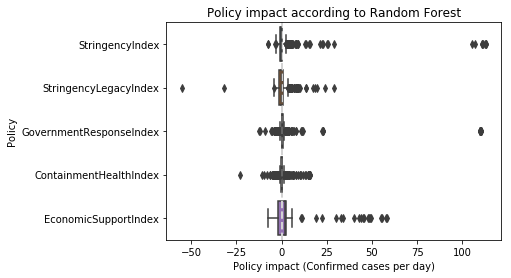

In [88]:
sns.boxplot(y='Policy', x='Policy impact', data=cds)
plt.xlabel('Policy impact (Confirmed cases per day)')
#plt.xlim(-10, 10)
plt.title('Policy impact according to Random Forest')
plt.axvline(0, linewidth=2, linestyle='--', color='lightgrey')
plt.show()

In [103]:
shap.initjs()

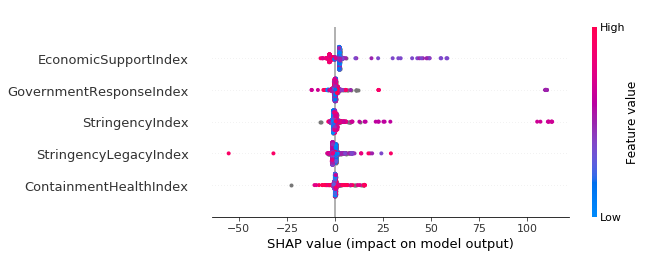

In [119]:
shap.summary_plot(sv_ds[cols_indexes].values, ds.loc[test_ids, cols_indexes].head(1000), title='Policy impact (confirmed cases per day)',)
plt.show()

In [141]:
if os.path.abspath('../../FCA_BB_interpret') not in sys.path:
    sys.path.append(os.path.abspath('../../FCA_BB_interpret'))

In [143]:
from lib import fca_interp as fcai

In [386]:
ds_us = ds[ds['Country']=='US']
#ds_us.index = ds_us.index.astype(str)
ds_us.shape, ds.shape

((137, 77), (25756, 77))

In [486]:
policy_ds = ds_us[[f for f in cols_policy if f.startswith('C')]].fillna(0)
policy_ds.shape, policy_ds.drop_duplicates().shape

((137, 8), (12, 8))

In [489]:
mvcntx_train = fcai.MultiValuedContext(policy_ds.loc[train_ids], cat_attrs=[])
mvcntx_nodup_train = fcai.MultiValuedContext(policy_ds.loc[train_ids].drop_duplicates(), cat_attrs=[])

In [490]:
mvcntx_test = fcai.MultiValuedContext(policy_ds.loc[test_ids], cat_attrs=[])
mvcntx_nodup_test = fcai.MultiValuedContext(policy_ds.loc[test_ids].drop_duplicates(), cat_attrs=[])

In [491]:
fm = fcai.FormalManager(mvcntx_nodup_train)

In [492]:
fm.construct_concepts()

In [493]:
fm._concepts = list(fm.get_concepts())+[fm.get_bottom_concept()]

In [494]:
for idx, c in enumerate(fm.sort_concepts()):
    c._idx = idx

In [495]:
for c in fm.get_concepts():
    int_ = c.get_intent()
    ext_ = mvcntx_train.get_extent(int_)
    c._extent = ext_

In [496]:
for c in fm.get_concepts():
    ext_ = [int(x) for x in c.get_extent()]
    for f in cols_target:
        c._metrics[f+'_diff_mean'] = ds.loc[ext_, f+'_diff'].mean()
        c._metrics[f+'_diff_std'] = ds.loc[ext_, f+'_diff'].std()

In [497]:
fm.construct_lattice(use_tqdm=True)

In [498]:
fm.calc_stability_approx(use_tqdm=True)

In [499]:
fig = fm.get_plotly_fig(color_by='Confirmed_diff_std')

In [500]:
fig

In [504]:
stab_concepts = [c for c in fm.get_concepts() if c._metrics['stab_min_bound'] is None or c._metrics['stab_min_bound']>=0.5]
len(stab_concepts)

49

In [505]:
from copy import copy

In [506]:
fm_stab = fcai.FormalManager(mvcntx_train)
fm_stab._concepts = [copy(c) for c in stab_concepts]
for idx, c in enumerate(fm_stab.sort_concepts()):
    c._idx = idx
fm_stab.construct_lattice(use_tqdm=True)
fm_stab.calc_stability_approx(use_tqdm=True)

In [507]:
fig_stab = fm_stab.get_plotly_fig(color_by='Confirmed_diff_mean')

In [508]:
fig_stab

In [510]:
fm.get_concept_by_id(10)._metrics

{'Confirmed_diff_mean': 52.46153846153846,
 'Confirmed_diff_std': 129.76864202298137,
 'Deaths_diff_mean': 1.1538461538461537,
 'Deaths_diff_std': 2.4445587065940795,
 'Recovered_diff_mean': 0.23076923076923078,
 'Recovered_diff_std': 0.7570682517832988,
 'stab_min_bound': 0.4990234375,
 'stab_max_bound': 0.5,
 'log_stab_min_bound': 0.997184984392946,
 'log_stab_max_bound': 1.0,
 'lstab_min_bound': -7.0}

In [511]:
fm.predict_context(mvcntx_nodup_test, metric=[f+'_diff_mean' for f in cols_target])

[array([25786.4375,  1569.    ,  4060.1875])]

In [516]:
c = fm.get_concept_by_id(5)
c

PatternStructure 5
level: 2
extent (len: 68): 23877, 23878, 23879, 23880, 23881, 23882, 23883, 23884, 23885, 23886, 23887, 23888, 23889, 23890, 23891, 23892, 23893, 23894, 23895, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23904, 23905, 23906, 23907, 23908, 23909, 23910, 23911, 23912, 23913, 23914, 23915, 23916, 23917, 23918, 23919, 23920, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23931, 23932, 23933, 23934, 23935, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944
intent (len: 8): C1_School closing in [0.0, 3.0], C2_Workplace closing in [0.0, 3.0], C3_Cancel public events in [1.0, 2.0], C4_Restrictions on gatherings in [0.0, 4.0], C5_Close public transport in [0.0, 1.0], C6_Stay at home requirements in [0.0, 2.0], C7_Restrictions on internal movement in [0.0, 2.0], C8_International travel controls in [2.0, 3.0]
new extent (len: 0): ∅
new_intent (len: 1): C3_Cancel public events
lower neighbours (len: 2): 8, 9
upper neighbours (len: 1)

In [518]:
up = fm.get_concept_by_id(2)
up

PatternStructure 2
level: 1
extent (len: 96): 23849, 23850, 23851, 23852, 23853, 23854, 23855, 23856, 23857, 23858, 23859, 23860, 23861, 23862, 23863, 23864, 23865, 23866, 23867, 23868, 23869, 23870, 23871, 23872, 23873, 23874, 23875, 23876, 23877, 23878, 23879, 23880, 23881, 23882, 23883, 23884, 23885, 23886, 23887, 23888, 23889, 23890, 23891, 23892, 23893, 23894, 23895, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23904, 23905, 23906, 23907, 23908, 23909, 23910, 23911, 23912, 23913, 23914, 23915, 23916, 23917, 23918, 23919, 23920, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23931, 23932, 23933, 23934, 23935, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944
intent (len: 8): C1_School closing in [0.0, 3.0], C2_Workplace closing in [0.0, 3.0], C3_Cancel public events in [0.0, 2.0], C4_Restrictions on gatherings in [0.0, 4.0], C5_Close public transport in [0.0, 1.0], C6_Stay at home requirements in [0.0, 2.0], C7_Restrictions on internal 